This tutorial was based on contend created by Mike Foster and Sarah Williams forT for the Spring 2017 Big Data and Visualization course.

# Intro to Pandas

**Pandas** is a library for Python for data manipulation and analysis. Pandas expands the data processing capacities of Python and adds a number of classes for easily importing data, in particular numerical tables, from various formats into their DataFrame object. A DataFrame is Panda’s basic object that allows multidimensional data processing and indexing. DataFrames can be easily and efficiently queried without the need of cumbersome syntax and convoluted loops. DataFrames can be merged with other data, they can be sliced, and they can be reshaped; in a way, we can think of Pandas as a big data combination of Excel and SQL. 

### Objective and Resources

In this exercise, we want to explore presidential election results in Centre County Pennsyvania. We are going to use Pandas, Numpy, and Matplotlib as our tools to explore the data.

First, there is a short example will introduce us to the dataset, some data wrangling functions of Pandas, and a few plots with Matplotlib.

Throughout the exercises we will be continuously using Pandas and some of its merging functionality to join the numerous OD files available. We will be building exploratory data visualizations, finding urban patterns and locating divergent areas within the dataset. Some useful documentation for merging data with Pandas can be found at:

http://pandas.pydata.org/pandas-docs/stable/merging.html

### Installing Libraries
First, lets install our libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle, islice

# This line lets us plot on our ipython notebook
%matplotlib inline

### Data Frames
Now let's dive into dataframes. This is the basic unit for Python!

You can think of a dataframe as a manipulable, multidimension Python array. They are based off of numpy arrays, can hold structured data, and you can perform functions on them to manage data, such as query, select, join, group. Let's setup a really simple dataframe.

In [ ]:
# Create empty dataframe
df = pd.DataFrame()

# Create a column
df['name'] = ['Joey', 'Jeremy', 'Jenny']

# View dataframe
df

Now let's see how we can use this dataframes with existing datasets

### Reading Files

Pandas provides a number of reader functions that process files and return a pandas object or DataFrame. Multiple different file types can be read, like csv, txt, xls, and json. The function parses the tabular data contained in the files and returns a formatted and indexed DataFrame. A number of additional arguments can be speficied, allowing to define the type of separator for text files, the header, the column to use as an index, etc. 
Additional documentation can be found on the API: http://pandas.pydata.org/pandas-docs/stable/index.html

Next, let's open up one of the files. Let's look at the voter registrations, this is the same as we did in the inclass.

**Problem 1: Load CENTRE_FVE_20170123.csv into Pandas as a data frame called 'df_voters'.**

Remember that you need to tell pandas where YOUR txt file is. The path link below likely won't work. Where did you save your data?


In [3]:
df_voters = pd.read_table('data\centrecounty_precinct_results_nov2016.txt', sep=',')

Initially, we only specify that the way the file is seperated is with a comma, but there can be many different arguments that you can additionally include. The internet can tell you about it all! http://pandas.pydata.org/pandas-docs/stable/index.html

When importing large datasets it is handy to take a little preview of the data. If you print *all* of the dataset it would take a while since these datasets have hundreds of thousands of rows. A previes can give you the gist of the data. To do so, we use head() to print the frist 5 rows of the table

In [17]:
# We can print the first 5 rows of the df
df_voters.head()

,County,ElecYear,Election,ElecDate,PrecNo,PrecName,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
0,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,NaN,REGISTERED VOTERS - TOTAL,NaN,NaN,NaN,10.0,507.0,NaN,NaN,NaN
1,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,NaN,BALLOTS CAST - TOTAL,NaN,NaN,NaN,11.0,391.0,NaN,NaN,NaN
2,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,NaN,VOTER TURNOUT - TOTAL,NaN,NaN,NaN,12.0,NaN,77.12,NaN,NaN
3,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,DEMOCRATIC,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,DEMOCRATIC,17.0,46.0,40.35,NaN,NaN
4,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,REPUBLICAN,STRAIGHT PARTY,NaN,VOTE FOR NOT MORE THAN 1,REPUBLICAN,18.0,66.0,57.89,NaN,NaN


Cool! We just imported data and got a snapshot of what the full dataset looks like. Let's dig in more

### DataFrame methods
The df object has methods, or functions belonging to it, which allow it to do things. For example df.head() is a method that shows the first 5 rows of the dataframe. df.dtypes returns the data types of each of the columns. 
Additional documentation can be found here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html In general, the API is the best resource: http://pandas.pydata.org/pandas-docs/stable/api.html

Other useful dataframe  methods include:
    df.dtypes
    df.shape
    df.columns


In [ ]:
#try a dataframe method of your choice! Fill in the code below:
df_voters.

To start us off, we need to determine what election results are included in the data. What method can we use to see the differnt column names and see what we can use? Fil in the code below:

In [ ]:
#What method can we use to see the column names?
df_voters.

Hopefully you got it without just looking further down in the code...
We found the Contest column looks promising! Let's look at what that column contains. We can use the df method .unique() to see the unique values in the column


In [20]:
# View the unique values in the Contest column.
df_voters['Contest'].unique()

array(['REGISTERED VOTERS - TOTAL', 'BALLOTS CAST - TOTAL',
       'VOTER TURNOUT - TOTAL', 'STRAIGHT PARTY', 'PRESIDENTIAL ELECTORS',
       'UNITED STATES SENATOR', 'ATTORNEY GENERAL', 'AUDITOR GENERAL',
       'STATE TREASURER', 'REPRESENTATIVE IN CONGRESS 5TH CONGRESSIONAL',
       'REPRESENTATIVE IN THE GENERAL ASSEMBLY 171ST LEGISLATIVE',
       'JUDGES AGE',
       'REPRESENTATIVE IN THE GENERAL ASSEMBLY 76TH LEGISLATIVE',
       'REPRESENTATIVE IN THE GENERAL ASSEMBLY 77TH LEGISLATIVE',
       'REPRESENTATIVE IN THE GENERAL ASSEMBLY 81ST LEGISLATIVE', nan], dtype=object)

Wow, a lot of contest types. Let's stick to the presidential election and start querying for that data.

### Querying
Now that we see that there are a range of election results in this file, dig deeper into the presidential election results.

Pandas DataFrames have built-in methods for performing queries in a SQL style. They can be diced, sorted, etc it. We can apply any of this queries to parts of the df, and based on this query select subsets of the whole df. Let's do some filtering and querying.
The output of this is a series, see below.

To print out the table with only the rows we want, we can apply what is called a filter. We can use the df mask to get a filtered dataframe: we use the mask to "index" into the dataframe to get the rows we want.

In [18]:
#query just results from the presidential election
df_voters['Contest'] == 'PRESIDENTIAL ELECTORS'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8        True
9        True
10       True
11       True
12       True
13       True
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3496    False
3497    False
3498    False
3499    False
3500    False
3501    False
3502    False
3503    False
3504    False
3505    False
3506    False
3507    False
3508    False
3509    False
3510    False
3511    False
3512    False
3513    False
3514    False
3515    False
3516    False
3517    False
3518    False
3519    False
3520    False
3521    False
3522    False
3523    False
3524    False
3525    False
Name: Contest, dtype: bool

While that doesn't look very helpful it's the data that is under the hood of everything we will look at going forward. At it's core the query is just a boolean result, true or false in response to the query (in this case is the contest type presidential electors?)

We can wrap the mask in the dataframe so that the results are more interpretable to a human. Let's try that. 

In [21]:
df_pres = df_voters[df_voters['Contest']== 'PRESIDENTIAL ELECTORS']
df_pres

,County,ElecYear,Election,ElecDate,PrecNo,PrecName,Party,Contest,Descr,VoteFor,Candidate,Posn,Count,PctCnt,Total,PctTot
8,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",26.0,188.0,48.08,NaN,NaN
9,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",27.0,174.0,44.50,NaN,NaN
10,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,CONSTITUTION PARTY,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DARRELL L CASTLE, PRESIDENT",28.0,2.0,0.51,NaN,NaN
11,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,GREEN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"JILL STEIN, PRESIDENT",29.0,3.0,0.77,NaN,NaN
12,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,LIBERTARIAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"GARY JOHNSON, PRESIDENT",30.0,22.0,5.63,NaN,NaN
13,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,1.0,01 BELLEFONTE NORTH,NaN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,WRITE-IN,31.0,2.0,0.51,NaN,NaN
47,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,2.0,02 BELLEFONTE NORTHEAST,DEMOCRATIC,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"HILLARY CLINTON, PRESIDENT",111.0,259.0,38.14,NaN,NaN
48,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,2.0,02 BELLEFONTE NORTHEAST,REPUBLICAN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DONALD J TRUMP, PRESIDENT",112.0,385.0,56.70,NaN,NaN
49,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,2.0,02 BELLEFONTE NORTHEAST,CONSTITUTION PARTY,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"DARRELL L CASTLE, PRESIDENT",113.0,9.0,1.33,NaN,NaN
50,"CENTRE COUNTY, PENNSYLVANIA",2016.0,GENERAL ELECTION,NOVEMBER 8 2016,2.0,02 BELLEFONTE NORTHEAST,GREEN,PRESIDENTIAL ELECTORS,NaN,VOTE FOR NOT MORE THAN 1,"JILL STEIN, PRESIDENT",114.0,7.0,1.03,NaN,NaN


Now that we have data filtered how we want, let's look a little deeper at the different parts of the dataset.
If we scroll over to the right we'll see that there's 'Count' and 'PctCnt'. Those two seem like the columns we'll want.
It's always good to take a second to gut check what you're seeing in the dataframe. It looks like the dataframe has broken up by precinct each candidate, the count of vote results and percent.


### Bar Charts

There's still a lot of disaggregated data. Let's try to explore the data by making some charts!

To get a simple exploratory plot, we use Matplotlib. Matplotlib is integrated into Pandas, and you can create plots from data frames. For more reading, check out the Matplotlib documentation at [Pandas Plotting Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and the [Matplotlib Documentation](http://matplotlib.org/2.0.0/contents.html).


We'll start by grouping the results by each candidate. When we group data we can then use functions like sum on specific columns. When looking at the columns in df_pres, what column would we want to sum? Count would seem like the best option! This column name can be a little confusing because it is also a method


In [11]:
# Your code here
grouped = df_pres.groupby('Candidate').Count.sum()
grouped

Candidate
DARRELL L CASTLE,  PRESIDENT      344.0
DONALD J TRUMP,  PRESIDENT      35274.0
GARY JOHNSON, PRESIDENT          2644.0
HILLARY CLINTON,  PRESIDENT     37088.0
JILL STEIN,  PRESIDENT            798.0
WRITE-IN                         1159.0
Name: Count, dtype: float64

This doesn't look as nice as our dataframes! Let's store the results in a dataframe and plot it as a bar chart

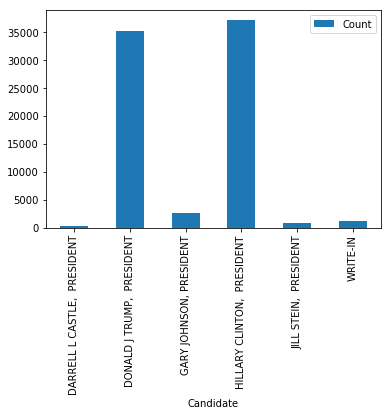

In [13]:
df_candidates = grouped.to_frame()
df_candidates.plot.bar(legend=True)


How could we further break down the candidates? What if we included Trump, Clinton and grouped everyone else togehter?


We're doing a lot here - first we make sure to name our columns. If we had multiple columns we could set the array to have multiple names. We also set our index, think of this as our column with unique values

Next, similar to what we did for the candidates dataframe we want to take the totals from df_candidates for each candidate and then combine the results for everyone NOT Clinton or Trump. Note that for that we use the [column_name].sum() rather than the [column_name].item()

You will then need to create a new numpy array that contains the summed valued for each group and create the new data frame with your answer. This [Stack Exchange Question](http://stackoverflow.com/questions/17839973/construct-pandas-dataframe-from-values-in-variables) will help you, along with the [Pandas documentation on DataFrames](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).


In [14]:
#let's see what df_candidates looks like. 
df_candidates

,Count
Candidate,
"DARRELL L CASTLE, PRESIDENT",344.0
"DONALD J TRUMP, PRESIDENT",35274.0
"GARY JOHNSON, PRESIDENT",2644.0
"HILLARY CLINTON, PRESIDENT",37088.0
"JILL STEIN, PRESIDENT",798.0
WRITE-IN,1159.0


In [23]:
#to set up this dataframe we need to set the columsn and the index so we can reference them
df_candidates.columns= ['NUMBER']
df_candidates.index.names=['Candidate']

In [24]:
df_candidates

,NUMBER
Candidate,
"DARRELL L CASTLE, PRESIDENT",344.0
"DONALD J TRUMP, PRESIDENT",35274.0
"GARY JOHNSON, PRESIDENT",2644.0
"HILLARY CLINTON, PRESIDENT",37088.0
"JILL STEIN, PRESIDENT",798.0
WRITE-IN,1159.0


Now we can create an array with the numbers aggregated the way we want. You'll notice that instead of querying the dataframe the way we did before we use .index

Does it make sense how we sum the rest of the candidates? What methods are used to get the actual numbers of votes for each candidate? 

In [27]:
#creating an array with the numbers we want
values = np.array([df_candidates[(df_candidates.index == 'HILLARY CLINTON,  PRESIDENT')].NUMBER.item(),df_candidates[(df_candidates.index == 'DONALD J TRUMP,  PRESIDENT')].NUMBER.item(),df_candidates[(df_candidates.index != 'HILLARY CLINTON,  PRESIDENT') & (df_candidates.index != 'DONALD J TRUMP,  PRESIDENT')].NUMBER.sum()])

#turning that aray into a dataframe with an array with corresponding candidate names
cand = ["Clinton", "Trump", "Other"]
df_pres_res = pd.DataFrame(values, index=cand)
df_pres_res.columns = ['Votes']
df_pres_res



,Votes
Clinton,37088.0
Trump,35274.0
Other,4945.0


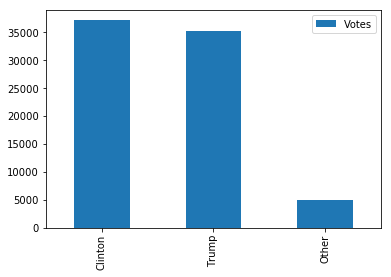

In [28]:
df_pres_res.plot.bar(legend=True)

There we have it! The presidential election results for one county in Pennsylvania in a bar chart!         

**Problem 2: Plot this as a bar chart, using red for Republican, blue for Democrat, and yellow for other.**

You can learn more about bar plots in in the [Bar Plot Documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-barplot). This will also give you hints as to how you can assign colors, along with the other properties affiated with bar charts, such as legends and axes.

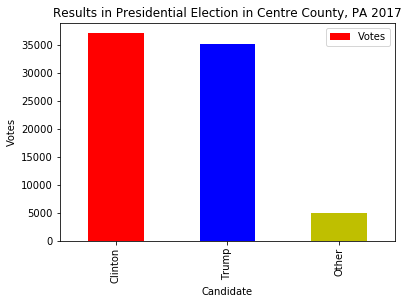

In [29]:
plt1 = df_pres_res.plot.bar(color = ['r', 'b', 'y'])
plt1.set_title('Results in Presidential Election in Centre County, PA 2017')
plt1.set_ylabel('Votes')
plt1.set_xlabel('Candidate')

plt.show()

## Part 2 - Scatterplotting

Now we will use the **precinct_centroids** file provided to display the geographical location of the centroid of each precinct, plot them in a scatterplot, then size the points in the scatterplot according to the number of votes. We can understand some spatial components to election results by using scatterplot to show lat/long.

First, load the CSV.

In [30]:
df_precinct_locations = pd.read_table('/data/center_county_precinct_centroids.csv', sep=',', low_memory=False)
df_precinct_locations.head()

,X,Y,OBJECTID,NAME,Precinct,GlobalID,MDJ,ShapeSTAre,ShapeSTLen
0,-77.972391,41.129340,1,BURNSIDE,40,{A309C3DE-8AD8-46A5-B8EA-B8F7E1ADB972},49-3-03,2.530029e+09,280069.560289
1,-77.641414,41.068505,2,LIBERTY,60,{57577111-D7B7-4048-9517-EF2ED6059928},49-3-02,6.878831e+08,131265.443714
2,-77.688090,41.010310,3,HOWARD TWP,58,{C9B8B5CF-6699-485A-97D2-74FB9B2D6FFE},49-3-02,5.275320e+08,111072.612891
3,-77.642348,40.985981,4,MARION,61,{FA3740D2-624B-4464-B6CD-16F6E219ADEA},49-3-02,6.135493e+08,131038.017743
4,-77.949892,41.027568,5,SNOW SHOE,14,{908F092A-BCFF-4EA5-99D7-B9248A2EA56A},49-3-03,1.644442e+07,19920.287608


Now that we have a new `DataFrame` for each precinct and the geographical location of its centroid, we can use lat/lon values to create a scatter plot. We can even vary their size based on the variables or criteria we set. If variation across precincts is not that big, we can use a log function to better visualize it on our plot. Numpy has a quick log implementation:
```Python
np.log(value)
```
In this following example, we give the points a simple size of 25.

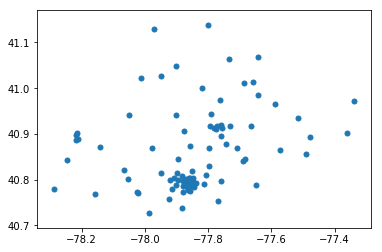

In [31]:
plt.scatter(df_precinct_locations['X'],df_precinct_locations['Y'], s=25)
plt.show()

**Problem 4: Using the above example, and the documentation on scatterplots, create two scatterplots using longitude and latitude X and Y locations, one showing percentage of vote for Trump, and other percentage of vote for Clinton. Make the Trump dots colored red, and Clinton blue.**

Find the [Scatterplot documentation here](http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html#scatter-plot)

Hint: You will need to join the results precincts file to the centroids, and then set the size of the plot points to be the percentages. This is accessed using the S property.

To perform the join, use merge. This [Stack Exchange](http://stackoverflow.com/questions/20375561/joining-pandas-dataframes-by-column-names) question will help!

Let's this about what data we want in the results:
We will need to get:
    the total number of voters in each precinct 
    total votes for Trump in each precinct 
    total votes for Clinton in each precinct
    X/Y coordinates for the precincts
    
To guide you through the process, let's break the problem into 5 steps. They build on some of the things we've gone  over. 




**A few tips** we will use the .loc method for dataframes to allow for label based indexing 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

We also introduce setting types with the astype() method

Joins and merges are standard in data science and programming. If you need some background information on Joins
http://www.pythonforbeginners.com/data-types/python-join-examples
https://chrisalbon.com/python/pandas_join_merge_dataframe.html
    

In [63]:
# Map 1: Votes for Trump

#Step 1: Query out all voters who voted in the election - hint you can use the contest column to find all registered voters
df_resRV= df_voters.loc[df_voters['Contest'] == 'REGISTERED VOTERS - TOTAL']
df_sum_RV = df_resRV[['PrecNo', 'Count']].astype(int).set_index('PrecNo')
df_sum_RV.columns = ['Count']
df_sum_RV

,Count
PrecNo,
1,507
2,853
3,697
4,1011
5,1378
6,892
7,504
8,712
9,581


In [62]:
#Step 2: Query out voters who voted for Trump
df_trump = df_pres.loc[df_pres['Candidate'] == 'DONALD J TRUMP,  PRESIDENT']
grouped = df_trump.groupby(['PrecNo']).Count.sum()
df_trumpgrp = df_trump[['PrecNo', 'Count']].astype(float).set_index('PrecNo')
df_trumpgrp.columns= ['Count']
df_trumpgrp

,Count
PrecNo,
1.0,174.0
2.0,385.0
3.0,193.0
4.0,375.0
5.0,398.0
6.0,443.0
7.0,228.0
8.0,352.0
9.0,233.0


In [65]:
#Step 3: Join voters for Trump with total voters in the election and compute the percentage
df_join = df_trumpgrp.join(df_sum_RV, lsuffix='_Results', rsuffix='_Total')
df_join['percent'] = np.multiply(np.divide(df_join['Count_Results'], df_join['Count_Total']), 100)
df_join

,Count_Results,Count_Total,percent
PrecNo,,,
1.0,174.0,507,34.319527
2.0,385.0,853,45.134818
3.0,193.0,697,27.690100
4.0,375.0,1011,37.091988
5.0,398.0,1378,28.882438
6.0,443.0,892,49.663677
7.0,228.0,504,45.238095
8.0,352.0,712,49.438202
9.0,233.0,581,40.103270


In [67]:
#Step 4:Extract x, y and precinct from the precinct locations file
df_location = df_precinct_locations[['Precinct', 'X', 'Y']].astype(float).set_index('Precinct')
#merge the two dataframes, based on the index
df_compare = pd.merge(df_join, df_location, right_index=True, left_index=True)

df_compare


,Count_Results,Count_Total,percent,X,Y
40.0,157.0,261,60.153257,-77.972391,41.129340
60.0,557.0,1106,50.361664,-77.641414,41.068505
58.0,350.0,631,55.467512,-77.688090,41.010310
61.0,347.0,674,51.483680,-77.642348,40.985981
14.0,236.0,460,51.304348,-77.949892,41.027568
7.0,228.0,504,45.238095,-77.657478,41.012795
82.0,587.0,903,65.005537,-77.903088,40.940300
54.0,349.0,759,45.981555,-77.362547,40.901267
53.0,736.0,1456,50.549451,-77.574319,40.864752
8.0,352.0,712,49.438202,-77.791943,40.942487


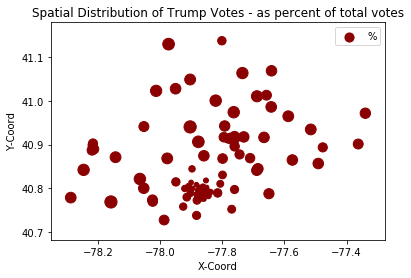

In [68]:
#Step 5: Create a scatterplot, where circle size varies by percent votes received
plt.scatter(df_compare['X'],df_compare['Y'], color='DarkRed', s=df_compare['percent']**1.2)
plt.title('Spatial Distribution of Trump Votes - as percent of total votes')
plt.legend('% Vote', fontsize = 'medium')
#plt.legend.handlelength()
plt.ylabel('Y-Coord')
plt.xlabel('X-Coord')
plt.show()


Wahoo! Now can you do the same thing for results for HIllary and see how the two compare?